In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

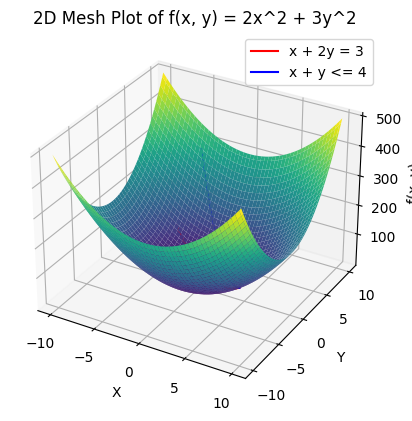

In [7]:
def f(x,y):
    return 2*x**2+3*y**2

#create a meshgrid of x and y values
x=np.linspace(-10,10,100)
y=np.linspace(-10,10,100)
X,Y=np.meshgrid(x,y)

#calculate the corresponding z values
Z=f(X,Y)

#create a 3d mesh plot
fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x, y)')
plt.title('2D Mesh Plot of f(x, y) = 2x^2 + 3y^2')

# Constraint: x + 2y = 3 (equality constraint)
x_constraint = np.linspace(-5, 5, 100)
y_constraint = (3 - x_constraint) / 2
ax.plot(x_constraint, y_constraint, f(x_constraint, y_constraint), color='red', label='x + 2y = 3')

# Constraint: x + y <= 4 (inequality constraint)
x_inequality = np.linspace(-5, 5, 100)
y_inequality = 4 - x_inequality
ax.plot(x_inequality, y_inequality, f(x_inequality, y_inequality), color='blue', label='x + y <= 4')

# Show the legend
ax.legend()

# Show the plot
plt.show()



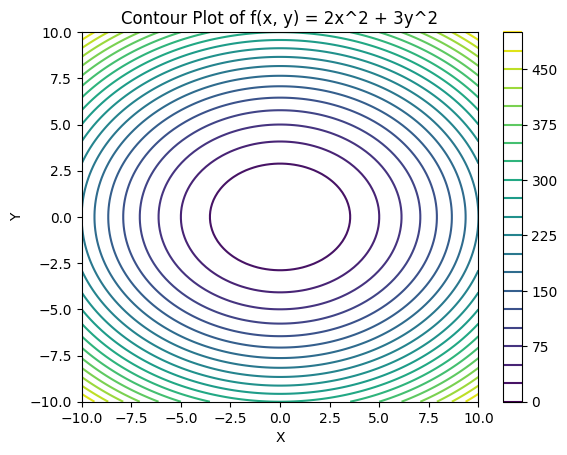

In [9]:
def f(x,y):
    return 2*x**2+3*y**2

#create a meshgrid of x and y values
x=np.linspace(-10,10,100)
y=np.linspace(-10,10,100)
X,Y=np.meshgrid(x,y)

#calculate the corresponding z values
Z=f(X,Y)

# Create a contour plot
plt.contour(X, Y, Z, levels=20, cmap='viridis')

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contour Plot of f(x, y) = 2x^2 + 3y^2')

# Show the plot
plt.colorbar()
plt.show()

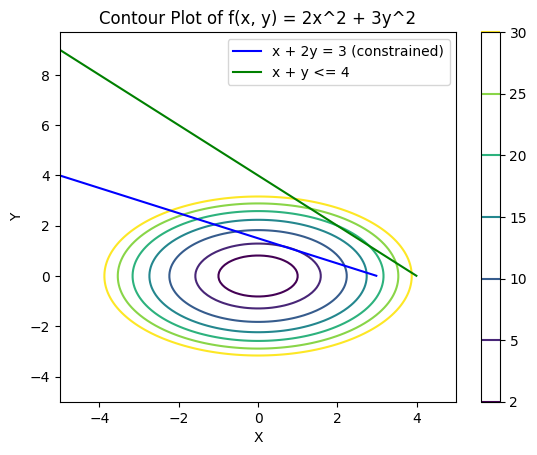

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x, y)
def f(x, y):
    return 2 * x**2 + 3 * y**2

# Create a range of x and y values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Calculate the corresponding z values using the function f(x, y)
Z = f(X, Y)

# Create a contour plot
contour_levels = [2, 5, 10, 15, 20, 25, 30]  # Customize contour levels
plt.contour(X, Y, Z, levels=contour_levels, cmap='viridis')

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contour Plot of f(x, y) = 2x^2 + 3y^2')

# Constraint: x + 2y = 3 (constrained line)
x_constraint_constrained = np.linspace(-5, 5, 100)
y_constraint_constrained = (3 - x_constraint_constrained) / 2
y_constraint_constrained[y_constraint_constrained < 0] = np.nan  # Mask points below x-axis
plt.plot(x_constraint_constrained, y_constraint_constrained, color='blue', label='x + 2y = 3 (constrained)')

# Constraint: x + y <= 4 (inequality constraint)
x_inequality = np.linspace(-5, 5, 100)
y_inequality = 4 - x_inequality
y_inequality[y_inequality < 0] = np.nan  # Mask points below x-axis
plt.plot(x_inequality, y_inequality, color='green', label='x + y <= 4')

# Show the legend
plt.legend()

# Show the plot
plt.colorbar()
plt.show()

In [6]:
import numpy as np

# Define your objective function f(x)
def objective(x):
    return 3 * x[0]**2 + 3 * x[1]**2  # Modify for your specific objective function

# Define equality constraints g(x) = 0
def equality_constraints(x):
    return x[0] + 2 * x[1] - 3  # Equality constraint: x + 2y = 3

# Define inequality constraints h(x) <= 0
def inequality_constraints(x):
    return 4 - (x[0] + x[1])  # Inequality constraint: x + y <= 4

# Initialize parameters
x = np.array([10.0, 10.0])  # Initial feasible point
t = 1.0  # Initial barrier parameter
alpha = 0.9  # Barrier update factor
convergence_tolerance = 1e-6  # Convergence tolerance

# Barrier Method iterations
while True:
    print("the x value is ",x," t value: ",t)
    # Formulate the Lagrangian with the barrier term
    lagrangian = objective(x) + t * (np.log(-inequality_constraints(x)).sum())

    # Calculate gradient and Hessian of the Lagrangian
    grad_L = np.array([6 * x[0], 6 * x[1]]) + t * (-1 / inequality_constraints(x))
    hess_L = np.array([[6, 0], [0, 6]]) + t * (1 / inequality_constraints(x)**2)

    # Solve the system of equations using Newton's method
    delta_x = -np.linalg.solve(hess_L, grad_L)

    # Update the barrier parameter: t = alpha * t
    t *= alpha

    # Update the iterate: x = x + alpha * Δx
    x += alpha * delta_x

    # Check for convergence
    if np.linalg.norm(delta_x) < convergence_tolerance:
        break

# Extract the solution x
optimal_x = x

# Calculate the optimal objective value
optimal_objective_value = objective(optimal_x)

# Print the results
print("Optimal x:", optimal_x)
print("Optimal Objective Value:", optimal_objective_value)


the x value is  [10. 10.]  t value:  1.0
the x value is  [1.0023407 1.0023407]  t value:  0.9
the x value is  [0.22636409 0.22636409]  t value:  0.81
the x value is  [0.06044819 0.06044819]  t value:  0.7290000000000001
the x value is  [0.03465092 0.03465092]  t value:  0.6561000000000001
the x value is  [0.02858844 0.02858844]  t value:  0.5904900000000002
the x value is  [0.02536416 0.02536416]  t value:  0.5314410000000002
the x value is  [0.02275112 0.02275112]  t value:  0.47829690000000014
the x value is  [0.02044118 0.02044118]  t value:  0.43046721000000016
the x value is  [0.01837227 0.01837227]  t value:  0.38742048900000015
the x value is  [0.01651546 0.01651546]  t value:  0.34867844010000015
the x value is  [0.01484817 0.01484817]  t value:  0.31381059609000017
the x value is  [0.01335067 0.01335067]  t value:  0.28242953648100017
the x value is  [0.01200537 0.01200537]  t value:  0.25418658283290013
the x value is  [0.01079658 0.01079658]  t value:  0.22876792454961012
th

/tmp/ipykernel_17201/3140699791.py:25: RuntimeWarning: invalid value encountered in log
  lagrangian = objective(x) + t * (np.log(-inequality_constraints(x)).sum())


SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (2045959752.py, line 27)